# **Load Dataset**

In [6]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Exploratory Data Analysis**



In [7]:
df.shape

(200, 5)

In [8]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.columns[df.isna().any()]

Index([], dtype='object')

# **Segregating the data**

In [12]:
X = df.iloc[:,3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# **scaling the data**

In [13]:
from sklearn.preprocessing import StandardScaler

X_alter = StandardScaler().fit_transform(X)
X_alter

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# **Dendrogram**

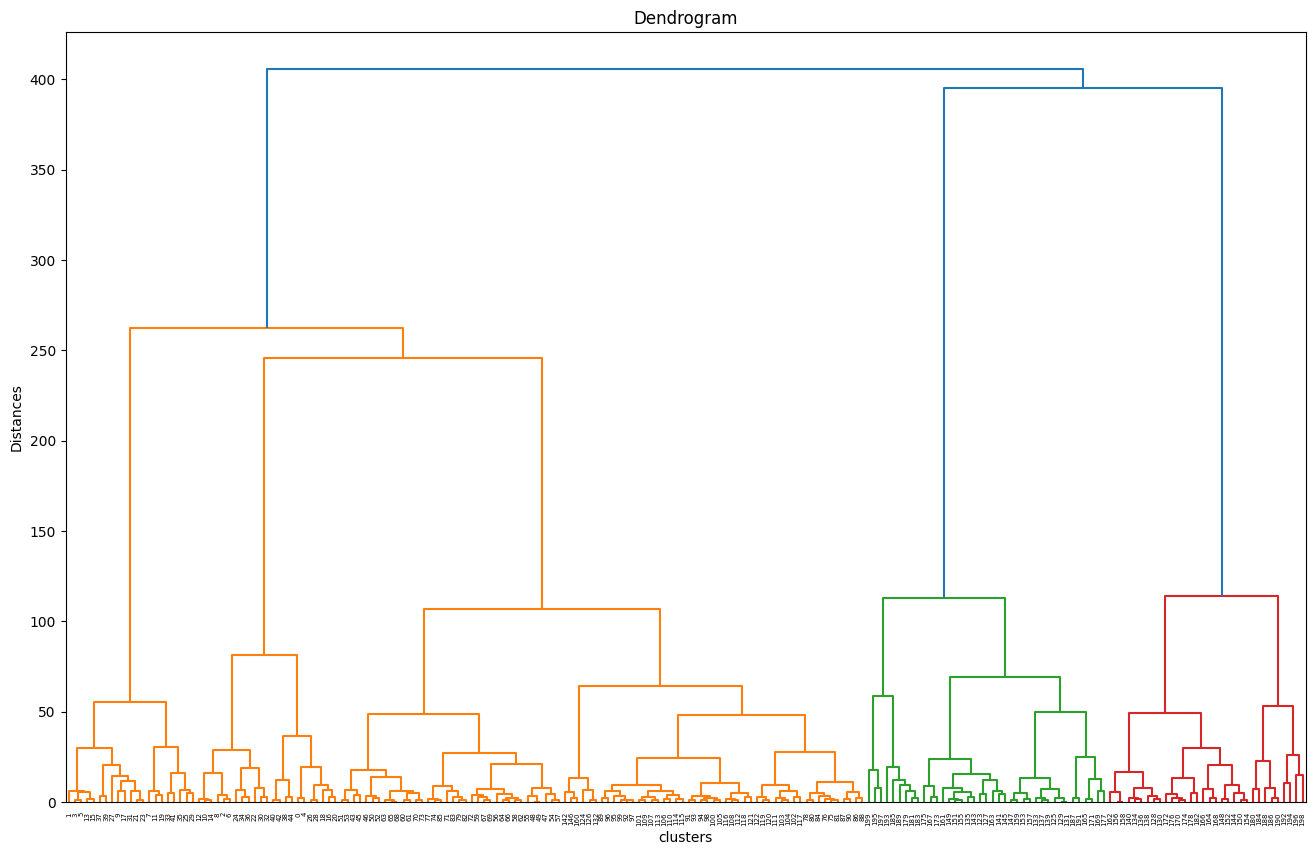

In [18]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as clus

plt.figure(1,figsize=(16,10))
dendrogram = clus.dendrogram(clus.linkage(X,method="ward"))

plt.title("Dendrogram")
plt.xlabel("clusters")
plt.ylabel('Distances')
plt.show()


In [24]:



Z = clus.linkage(X, method="ward")

max_d = 150  # You can adjust this value based on your dendrogram
clusters = clus.fcluster(Z, max_d, criterion='distance')

print(f"Cluster labels for each point in the dataset: {clusters}")
print(f"Number of clusters: {len(set(clusters))}")



Cluster labels for each point in the dataset: [2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 5 4 5 4 3 4 5 4 5 4 5 4 5 4 3 4 5 4 3 4
 5 4 5 4 5 4 5 4 5 4 5 4 3 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4]
Number of clusters: 5
1


# **Train the K-Means**

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_means=model.fit_predict(X)

# **Plotting Clusters**

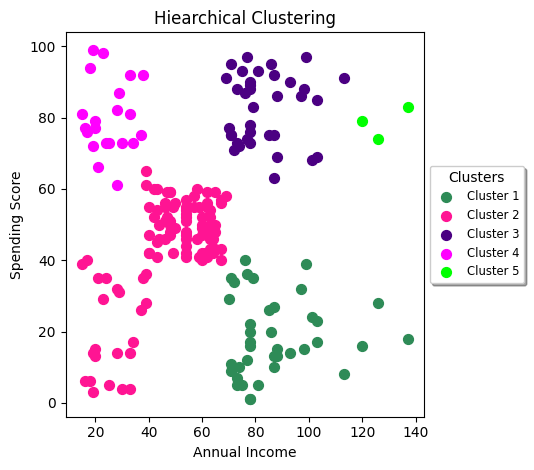

In [42]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], c='seagreen', s=50, label='Cluster 1')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], c='deeppink', s=50, label='Cluster 2')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], c='indigo', s=50, label='Cluster 3')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], c='magenta', s=50, label='Cluster 4')
plt.scatter(X[y_means == 4, 0], X[y_means == 4, 1], c='lime', s=50, label='Cluster 5')


plt.title("Hiearchical Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', fancybox=True, shadow=True, title='Clusters', frameon=True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
